In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split, GridSearchCV
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE

#Import dataset
dataset = pd.read_csv("fake_job_postings.csv")

#Chose class to predict
Class = "fraudulent"

#Fill empty rows with unspecified
df = dataset['requirements'].fillna('Unspecified')

#Combine datasets
dataset = pd.merge(dataset,df)

#Remove any row that has an empty column
dataset.dropna(axis='index', inplace=True)

#Remove select columns
dataset = dataset.drop(columns=['salary_range','company_profile','description','benefits','department','job_id'])

#Encode all strings into numbers
dataset = pd.DataFrame(preprocessing.OrdinalEncoder().fit_transform(dataset), columns=dataset.columns)

#Specify x and y data
OldX = dataset.drop(Class, axis = 1)
Oldy = dataset[Class]

#Oversample to get similar amounts in x and y
print('Original dataset shape %s' % Counter(Oldy))
sm = SMOTE(random_state=42)
X, y = sm.fit_resample(OldX, Oldy)
print('Resampled dataset shape %s' % Counter(y))

print(dataset.head(5))

#Old Oversampling technique
#print(Oldy.value_counts)
#ros = RandomOverSampler()
#X,y = ros.fit_resample(OldX,Oldy)
#print(y.value_counts)

# normalize data
scaler = MinMaxScaler(feature_range=(0, 1))
X_rescaled = scaler.fit_transform(X)
X = pd.DataFrame(data = X_rescaled, columns = X.columns)

set_of_classes = y.value_counts().index.tolist()
set_of_classes= pd.DataFrame({Class: set_of_classes})


print("Pre-processed data :")
print(X)

print("Pre-processed class :")
print(y)

Original dataset shape Counter({0.0: 1671, 1.0: 236})
Resampled dataset shape Counter({0.0: 1671, 1.0: 1671})
   title  location  requirements  telecommuting  has_company_logo  \
0  255.0      10.0         613.0            0.0               1.0   
1  596.0      91.0         316.0            0.0               1.0   
2  599.0     110.0         304.0            0.0               1.0   
3  269.0     100.0         414.0            0.0               1.0   
4  346.0      43.0         183.0            1.0               1.0   

   has_questions  employment_type  required_experience  required_education  \
0            1.0              1.0                  5.0                 4.0   
1            1.0              1.0                  3.0                 1.0   
2            0.0              1.0                  3.0                 7.0   
3            1.0              1.0                  5.0                 3.0   
4            0.0              1.0                  2.0                 1.0   

   ind

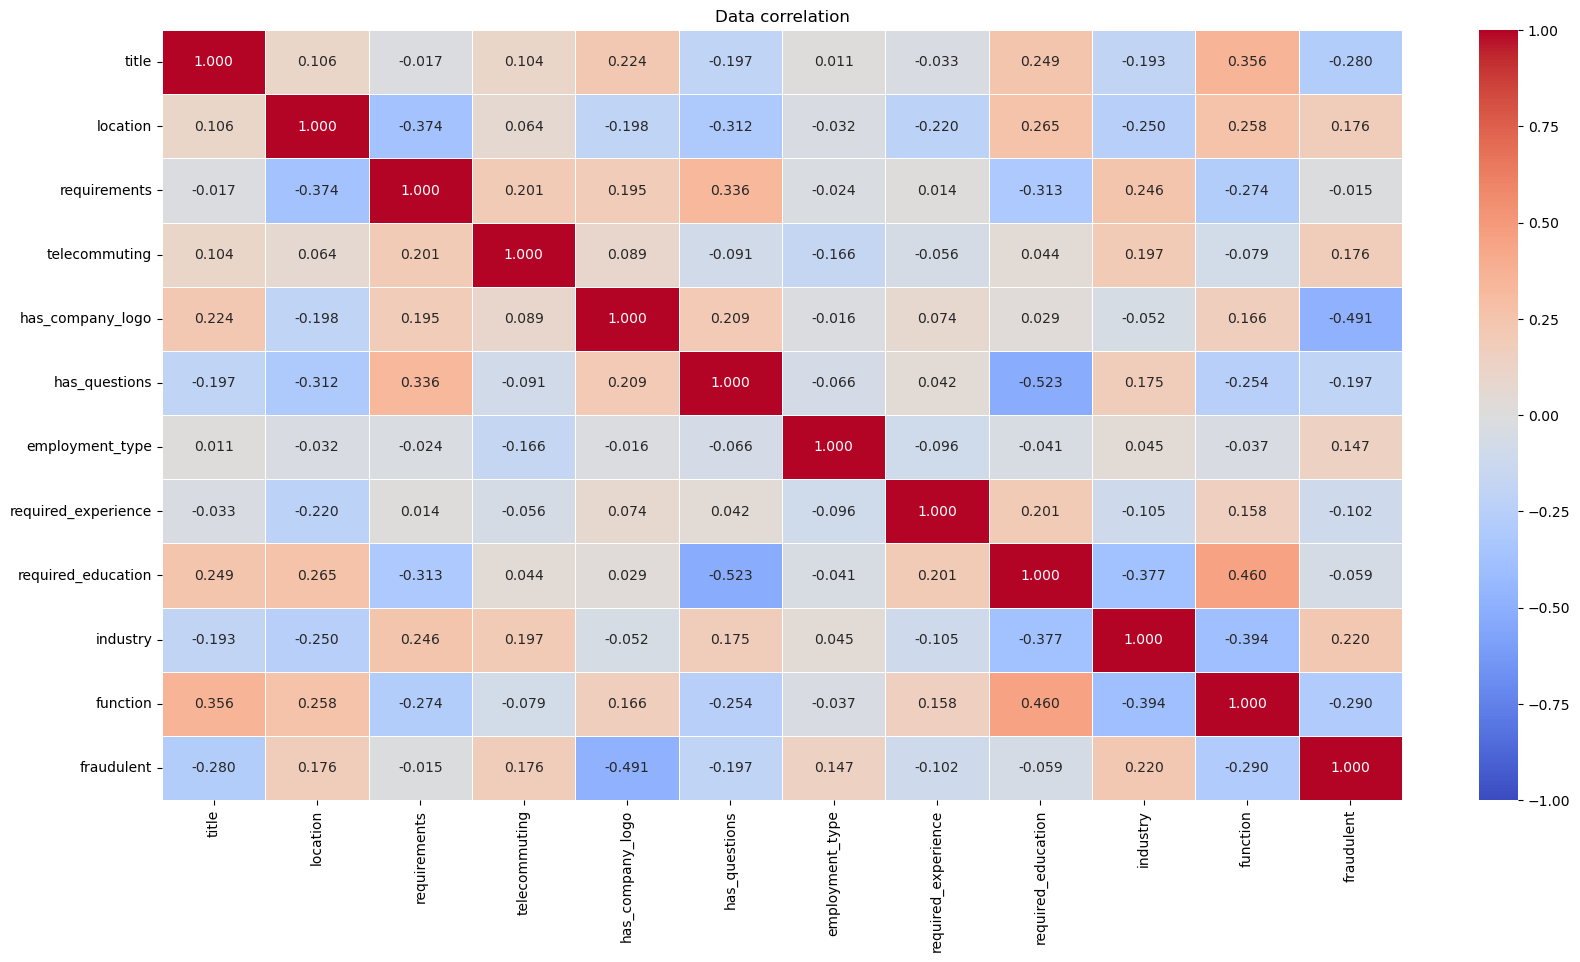

MLPClassifier(activation='logistic', alpha=0.001, batch_size=100,
              hidden_layer_sizes=(10, 2), learning_rate_init=0.2, max_iter=6000,
              random_state=42, solver='sgd')
         title  location  requirements  telecommuting  has_company_logo  \
2885  0.224756  0.824074      0.450000            1.0               1.0   
2159  0.208469  0.967593      0.004688            0.0               0.0   
226   0.781759  0.856481      0.004688            0.0               1.0   
2386  0.425364  0.490741      0.702660            0.0               1.0   
2395  0.498836  0.679988      0.515274            0.0               1.0   
...        ...       ...           ...            ...               ...   
3135  0.651848  0.474483      0.689568            0.0               1.0   
3026  0.208469  0.967593      0.004688            0.0               0.0   
976   0.610749  0.282407      0.365625            0.0               1.0   
1398  0.104235  0.884259      0.735938            0.0     

In [2]:


#HeatMap
fig, ax1 = plt.subplots(figsize=(20,10))
heatmap = sb.heatmap(dataset.corr(), annot=True, fmt='.3f', vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', linewidths=0.5, linecolor='white', ax=ax1)
ax1.set_title('Data correlation')
plt.show()

#splitting data into ratio 80:20
data_train, data_test, class_train, class_test = train_test_split(X, y, test_size=0.2)

#Setup model with select hyperparams
mlp = MLPClassifier(solver = 'sgd', random_state = 42, activation = 'logistic', alpha = 0.001, learning_rate_init = 0.2, batch_size = 100, hidden_layer_sizes = (10,2), max_iter = 6000)
print(mlp)

#If you want to grid search the hyper params
# mlp = MLPClassifier()
# param_grid = {
#    'hidden_layer_sizes': [(100,100), (20,10), (50, 50),(10,2)],
#    'activation': ['relu', 'tanh','logistic'],
#    'alpha': [0.0001, 0.001, 0.01, 0.1],
#    "max_iter": [200, 400,1000],
# }
# grid_search = GridSearchCV(mlp, param_grid, cv=5)
# grid_search.fit(data_train, class_train)

# # Final evaluation on test data
# best_model = grid_search.best_estimator_
# pred = best_model.predict(data_test)

# print(best_model)

#Fit the model to data
mlp.fit(data_train, class_train)
print(data_test)

In [3]:
#Predict test data
pred = mlp.predict(data_test)
print(pred)

from sklearn.metrics import classification_report, confusion_matrix, multilabel_confusion_matrix
from sklearn.metrics import mean_squared_error, accuracy_score, precision_score, recall_score

#Ways to report how good the model was
print("Accuracy : ", accuracy_score(class_test, pred))
print("Mean Square Error : ", mean_squared_error(class_test, pred))

print(pred[:5])
print("Confusion Matrix for each label : ")
print(multilabel_confusion_matrix(class_test, pred))

print("Classification Report : ")
print(classification_report(class_test, pred,zero_division=1))


[1. 1. 0. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1.
 0. 0. 1. 0. 1. 1. 0. 1. 0. 0. 0. 0. 1. 1. 1. 1. 0. 1. 0. 0. 0. 1. 0. 1.
 1. 0. 1. 0. 1. 1. 1. 0. 0. 1. 0. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 0. 0.
 1. 0. 1. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 1.
 1. 1. 1. 0. 0. 0. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 0. 0. 1. 1. 0. 1. 0. 1.
 0. 1. 1. 0. 1. 0. 0. 1. 1. 0. 1. 0. 0. 0. 1. 1. 0. 1. 0. 1. 0. 1. 0. 0.
 1. 0. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0.
 0. 0. 1. 1. 1. 0. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 0. 0. 1. 0. 1.
 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 1. 1. 0.
 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1. 0. 1. 0. 0.
 1. 0. 0. 1. 1. 0. 1. 1. 1. 0. 1. 0. 0. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1.
 0. 1. 0. 1. 0. 1. 0. 1. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 1. 1. 1. 0. 1.
 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0. 0. 1. 1. 0.
 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 1.

In [4]:
print(dataset.columns)

fraudulent = dataset[dataset['fraudulent']==1]
real = dataset[dataset['fraudulent']==0]

Index(['title', 'location', 'requirements', 'telecommuting',
       'has_company_logo', 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function',
       'fraudulent'],
      dtype='object')


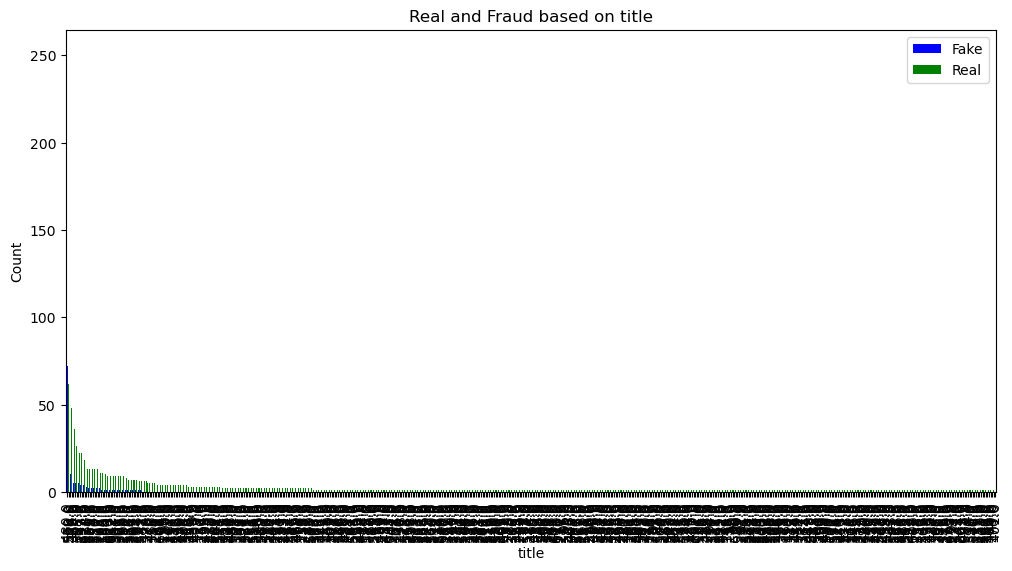

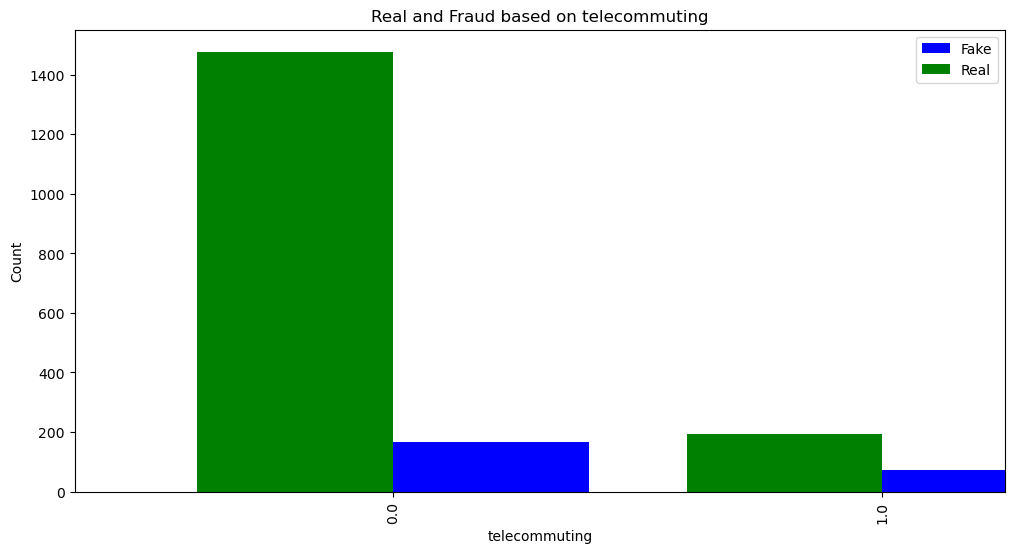

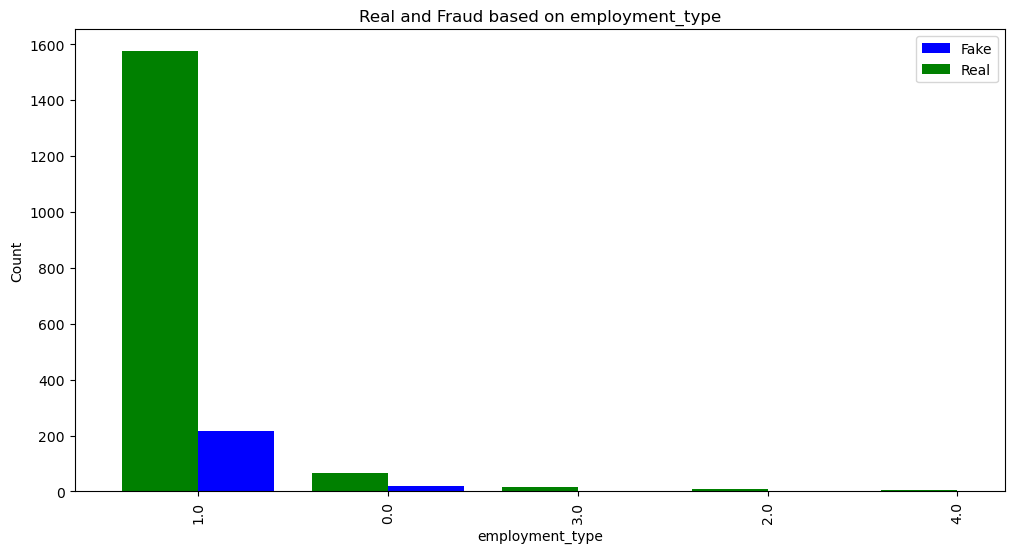

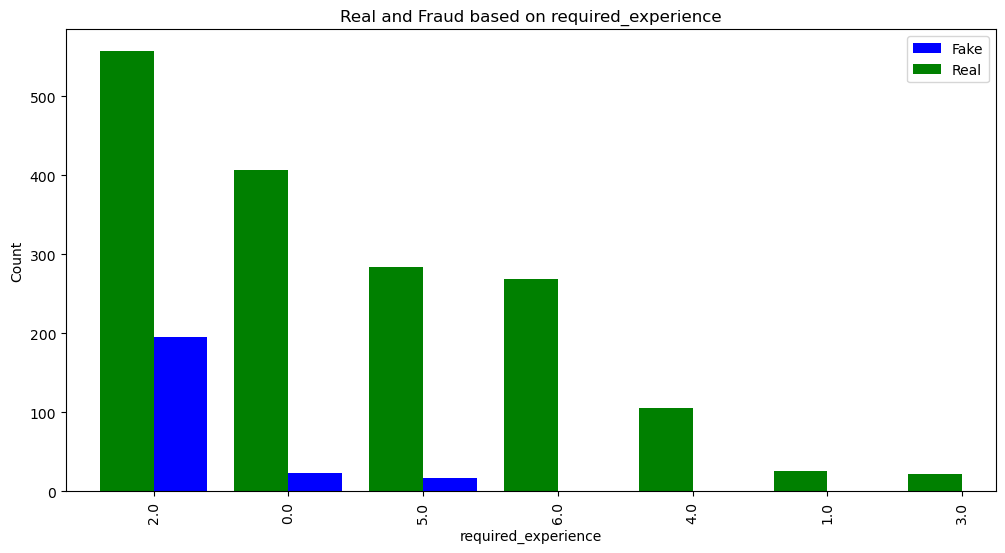

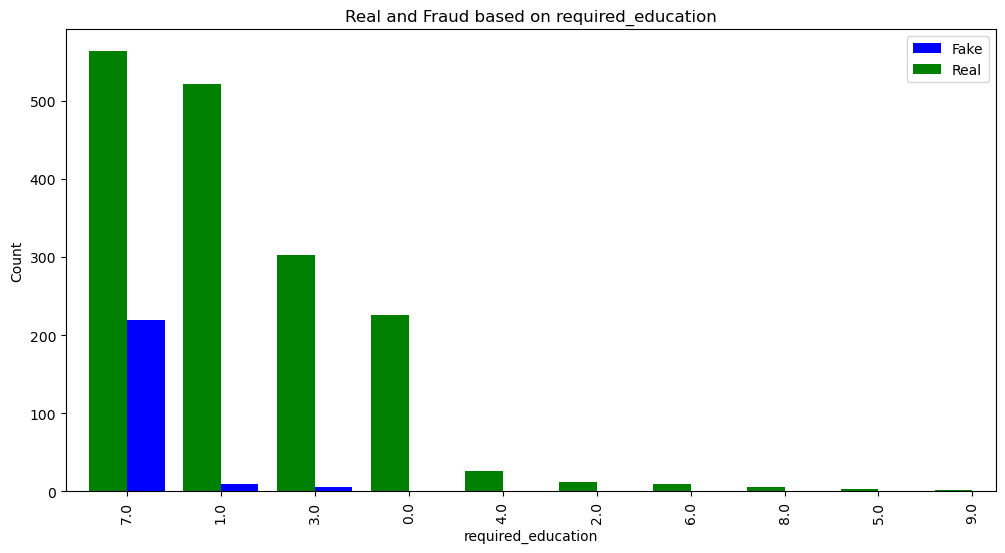

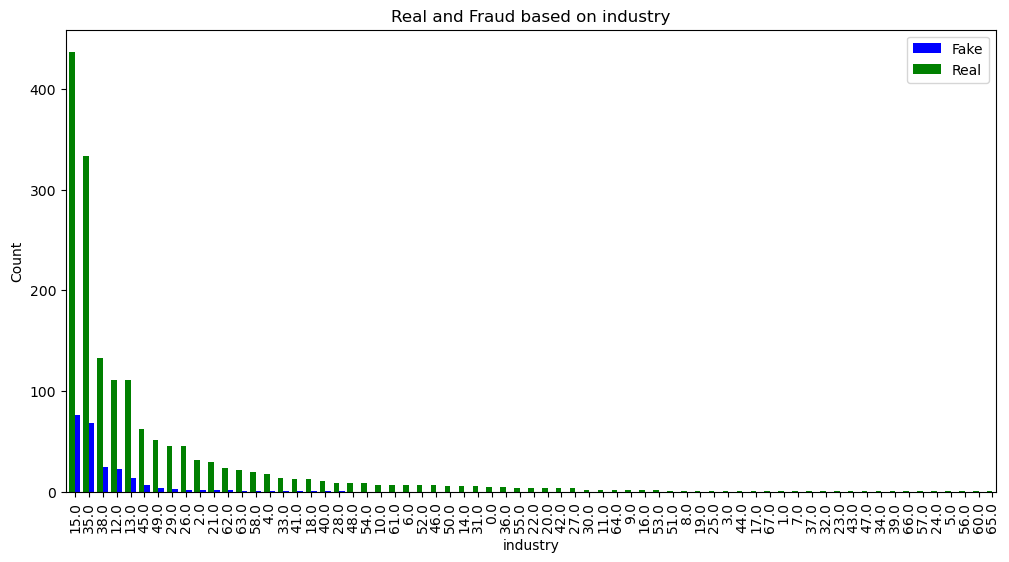

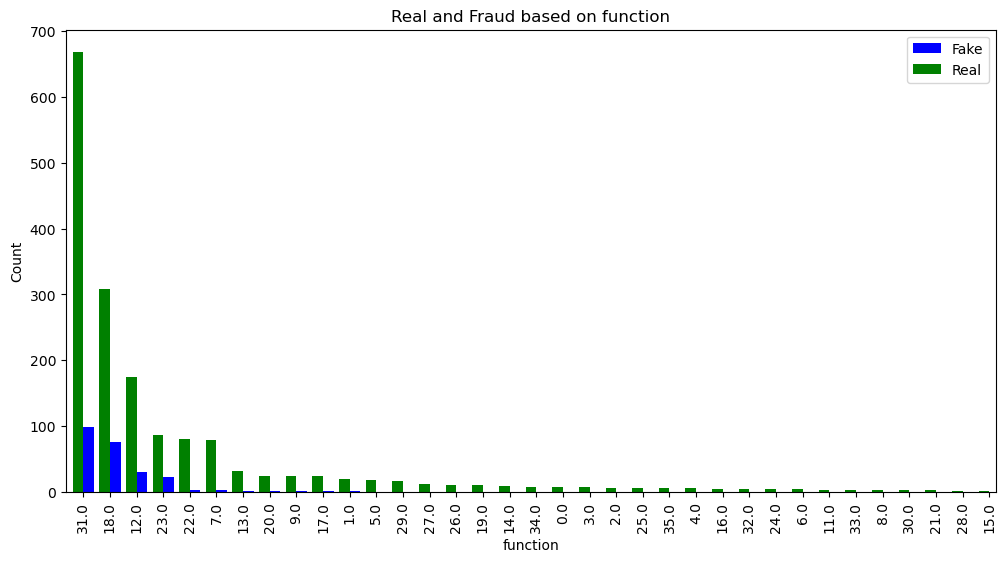

In [5]:
attrs = ['title', 'telecommuting', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function']

for attr in attrs: 
    
    counts_fraud = fraudulent[attr].value_counts()
    counts_real = real[attr].value_counts() 

    fig, ax = plt.subplots(figsize=(12, 6))

    counts_fraud.plot(kind='bar', color='blue', ax=ax, position=0, width=0.4, label="Fake")
    counts_real.plot(kind='bar', color='green', ax=ax, position=1, width=0.4, label="Real")

    ax.set_xlabel(attr)
    ax.set_ylabel('Count')
    ax.set_title('Real and Fraud based on ' + attr)

    ax.legend()

    plt.show()

In [7]:
print(data_test)

         title  location  requirements  telecommuting  has_company_logo  \
2885  0.224756  0.824074      0.450000            1.0               1.0   
2159  0.208469  0.967593      0.004688            0.0               0.0   
226   0.781759  0.856481      0.004688            0.0               1.0   
2386  0.425364  0.490741      0.702660            0.0               1.0   
2395  0.498836  0.679988      0.515274            0.0               1.0   
...        ...       ...           ...            ...               ...   
3135  0.651848  0.474483      0.689568            0.0               1.0   
3026  0.208469  0.967593      0.004688            0.0               0.0   
976   0.610749  0.282407      0.365625            0.0               1.0   
1398  0.104235  0.884259      0.735938            0.0               1.0   
1773  0.301303  0.356481      0.517188            0.0               1.0   

      has_questions  employment_type  required_experience  required_education  \
2885            0.